<a href="https://colab.research.google.com/github/elliot12-l/Bisecci-n/blob/main/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

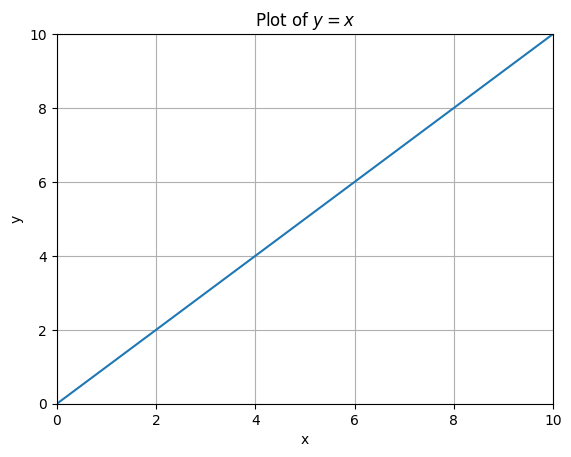

In [3]:
import numpy as np

import matplotlib.pyplot as plt

def equation(x:float)->float:
    return x

# Generate x values
x = np.linspace(-10, 10, 100)

# Calculate y values
y = equation(x)

# Plot the equation
plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y=x$')
ax = plt.gca()
ax.set_ylim([0, 10])
ax.set_xlim([0, 10])
plt.grid(True)
plt.show()


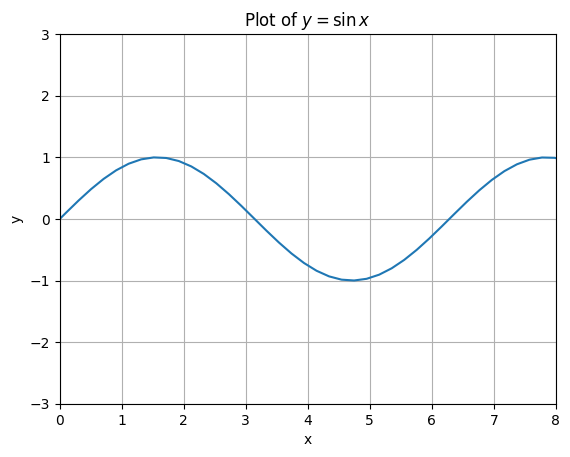

In [17]:
import numpy as np

import matplotlib.pyplot as plt

def equation(x:float)->float:
    return np.sin(x)

# Generate x values
x = np.linspace(-10, 10, 100)

# Calculate y values
y = equation(x)

# Plot the equation
plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y=\sin x$')
ax = plt.gca()
ax.set_ylim([-3, 3])
ax.set_xlim([0, 8])
plt.grid(True)
plt.show()

### Biseccion

In [19]:
from typing import Callable
def sign(x: float) -> int:
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0
def bisection(
    a: float, b: float, *, equation: Callable[[float], float], tol: float, N: int
) -> tuple[float, float, float, int] | None:
    i = 1

    # Input validation
    # Comente a continuación y vea qué sucede
    assert a < b, "a not lower than b, the interval is not valid."

    # Comente a continuación y vea qué sucede
    assert (
        equation(a) * equation(b) < 0
    ), "The function does not change sign over the interval."

    Fa = equation(a)
    p = a # to avoid crash in i == 0.
    for i in range(N):

        # esta alternativa es suceptible de desborde, especialmente si a y b son muy grandes
        # p = (a + b)/2

        p = a + (b - a) / 2
        FP = equation(p)
        if FP == 0 or (b - a) / 2 < tol:
            return p, a, b, i

        if sign(Fa) * sign(FP) > 0:

            # esta alternativa podría causar también un desborde
            # if Fa * FP > 0:

            a = p
            Fa = FP
        else:
            b = p

    # Respuesta temporal
    return p, a, b, i

    # Es mejor usar esta opción, cuando el algoritmo no llega a una tolerancia en
    # las iteraciones dadas.

    # raise ValueError(
    #     "Solution not found within the given tolerance and number of iterations"
    # )
def equation(x: float) -> float:
    return x-2*np.sin(x)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive


def plotting(a, b, i):
    x = np.linspace(a, b, 100)

    y = equation(x)
    x_i = x[0]
    try:
      x_i, a2, b2, i = bisection(a, b, equation=equation, tol=10e-5, N=i)
      all = True
    except Exception as e:
      all = False
      print(e)
      a2 = b2 = (a + b)/2

    ax = plt.gca()
    ax.cla()
    plt.plot(x, y);

    plt.xlabel('x');
    plt.ylabel('y');
    plt.title('Plot of $x-2\sin x =0$');
    plt.scatter(a, equation(a), color='blue', label='initial left lim');
    plt.scatter(b, equation(b), color='blue', label='initial right lim');
    if all:
      plt.scatter(a2, equation(a2), color='red')
      plt.scatter(b2, equation(b2), color='red')
      plt.scatter(x_i, 0, color='green', marker = "s", label='root');

      plt.hlines(0, a, b, colors= "black")
    plt.grid(True);
    plt.legend();

    plt.show();

interactive_plot = interactive(plotting, a=(-5,5,.1), b=(-5,5,.1), i=(0,11,1))
display(interactive_plot);


interactive(children=(FloatSlider(value=0.0, description='a', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…